# Conceptual

### 1. Using a little bit of algebra, prove that (4.2): $p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$ is equivalent to (4.3). In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \implies
p(X) (1 + e^{\beta_0 + \beta_1 X}) = e^{\beta_0 + \beta_1 X} \implies
p(X) = e^{\beta_0 + \beta_1 X} - p(X) e^{\beta_0 + \beta_1 X} \implies
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$

### 2. It was stated in the text that classifying an observation to the class for which (4.12) is largest is equivalent to classifying an observation to the class for which (4.13) is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(\mu_k, \sigma^2)$ distribution, the Bayes’ classifier assigns an observation to the class for which the discriminant function is maximized.

- We want to find the class $k$ for which $p(x)$ is the largest:

$
p(x) = \frac{
    \pi_k \frac{1}{\sqrt{2\pi \sigma}} exp(-\frac{1}{2\sigma^2} (x - \mu_k)^2)
}{
    \sum^{K}_{l=1} \pi_l \frac{1}{\sqrt{2\pi \sigma}} exp(-\frac{1}{2\sigma^2} (x - \mu_l)^2)
}
$


taking a log of the numerator:

$
log(\pi_k) + log(\frac{1}{\sqrt{2\pi \sigma}}) + -\frac{1}{2\sigma^2} (x - \mu_k)^2 \iff
c + log(\pi_k) + -x^2 \frac{1}{2\sigma^2} + x \mu_k \frac{1}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2}
$

where $c, -x^2 \frac{1}{2\sigma^2}$ are class-independent, so can be skipped (we're finding a max among all classes), leaving:

$
log(\pi_k) + x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2}
$


### 3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where $p = 1$; i.e. there is only one feature. Suppose that we have $K$ classes, and that if an observation belongs to the kth class then $X$ comes from a one-dimensional normal distribution, $X \sim N(\mu_k, \sigma_k^2)$. Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

$
p(x) = \frac{
    \pi_k \frac{1}{\sqrt{2\pi \sigma_k}} exp(-\frac{1}{2\sigma_k^2} (x - \mu_k)^2)
}{
    \sum^{K}_{l=1} \pi_l \frac{1}{\sqrt{2\pi \sigma_l}} exp(-\frac{1}{2\sigma_l^2} (x - \mu_l)^2)
} \implies
log(p(x)) \times c = log(\pi_k) + log(\frac{1}{\sqrt{2\pi \sigma_k}}) -\frac{1}{2\sigma_k^2} (x - \mu_k)^2
$

where $c$ is the same for all clases - the discriminator function depends only on the RHS, which is a quadratic function of $x$


### 4. When the number of features `p` is large, there tends to be a deterioration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when `p` is large. We will now investigate this curse.

(a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that X is uniformly (evenly) distributed on $[0, 1]$. Associated with each observation
is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$ we will use observations in the range $[0.55, 0.65]$. On average, what fraction of the available observations will we use to make the prediction?
- 0.1

(b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$. We assume that $(X_1, X_2)$ are uniformly distributed on $[0, 1] \times [0, 1]$. We wish to predict a test observation’s response using only observations that are within 10% of the range of X1 and within 10% of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range $[0.55, 0.65]$ for $X_1$ and in the range $[0.3, 0.4]$ for $X_2$. On average, what fraction of the available observations will we use to make the prediction?
- 0.01

(c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?
- $\frac{1}{10^{100}}$

(d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.
- In high dimensions, the hypercube around a given test point will likely not contain any neighbour - the cube is too small. (From A Few Useful Things to Know About Machine Learning, Pedro Domingos) (...) in high dimensions, a curious phenomenon arises: the ratio between the nearest and farthest points approaches 1, i.e. the points essentially become uniformly distant from each other. This phenomenon can be observed for wide variety of distance metrics, but it is more pronounced for the Euclidean metric than, say, Manhattan distance metric. The premise of nearest neighbor search is that "closer" points are more relevant than "farther" points, but if all points are essentially uniformly distant from each other, the distinction is meaningless.

(e) Now suppose that we wish to make a prediction for a test observation by creating a $p$-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1, 2, and 100$, what is the length of each side of the hypercube? Comment on your answer.
$$
V = 0.1 \\
L^N = V \implies L = \sqrt[^N]{V} \implies L = \sqrt[^N]{0.1} \\
L \overset{N = 100}{=} 0.977
$$
i.e. in order to capture (on average) 10% of samples, the hypercube in 100 dimensions needs to have a side length of 0.977

### 5. We now examine the differences between LDA and QDA
(a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?
- QDA will perform better on the training set as it's more flexible and will be able to fit the data better. LDA will perform better on the test set as QDA overfits to noise

(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?
- QDA will perform better on both train and test sets

(c) In general, as the sample size $n$ increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?
- As the sample size increases we expect the test prediction accuracy of QDA to improve as it is able to fit the data better (its variance decreases with more data). LDA is less flexible so won't respond to more data significantly. 

(d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.
- False. QDA will overfit (fit to error terms) and perform poorly on the test data.


### 6. Suppose we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$ = undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{\beta_0} = −6$, $\hat{\beta_1} = 0.05$, $\hat{\beta_2} = 1$.

(a) Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class.
- $p(Y=1) = \frac{e^{x^T \beta}}{1 + e^{x^T \beta}} = \frac{1}{1 + e^{-x^T \beta}} = \frac{1}{1 + e^{-(-6 + 40 * 0.05 + 3.5 * 1)}} = \frac{1}{1 + e^{0.5}} = 0.37$

(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?
- $\frac{e^{x^T \beta}}{1 + e^{x^T \beta}} = 0.5 \implies x^T \beta = ln(\frac{0.5}{1-0.5}) = 0 \implies -6 + 0.05 * x + 3.5 = 0 \implies x = 50 (h)$


### 7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on $X$, last year’s percent profit. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar{X} = 10$, while the mean for those that didn’t was $\bar{X} = 0$. In addition, the variance of $X$ for these two sets of companies was $\sigma^2 = 36$. Finally, 80% of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.

- Note: in the solution below, the constant $\frac{1}{\sqrt{2 \pi \sigma}}$ in the Gaussian distribution can be dropped because $\sigma$ is the same for both classes

$$
P(Y = 1 | X = 4) = \frac{P(X = 4 | Y = 1) P(Y = 1)}{P(X = 4)} = \frac{P(X = 4 | Y = 1) P(Y = 1)}{P(X = 4 | Y = 1) P(Y = 1) + P(X = 4 | Y = 0) P(Y = 0)} = \\
\frac{  e^{-(4-10)^2/(2*36)} * 0.8  }{    e^{-(4-10)^2/(2*36)} * 0.8 + e^{-(4)^2/(2*36)} * 0.2    } = \\
\frac{  e^{-1/2} * 0.8  }{    e^{-1/2} * 0.8 + e^{-2/9} * 0.2    } = \\
\frac{  0.485    }{ 0.485 + 0.160 } = 0.75
$$


### 8. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. $K = 1$) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

- We would choose Logsitic Regression. Training a KNN model is simply storing the training examples with their labels (no optimisation procedure involved). For $k=1$, at training time, the neirest neighobur for each sample is itself, giving a training error of 0%. Since the average error rate is here given as 18% then this implies 36% test error rate, which is higher than the one the LR.

### 9. This problem has to do with odds
(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?
- $p/(1-p) = 0.37 \implies p = 0.37/1.37 = 0.27$

(b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?
- $odds = p/(1-p) = 0.16/0.84 = 0.19$

# Applied

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the `Weekly`
data. Do there appear to be any patterns?
- Lag seems to be normally distributed with mean zero
- Volume increases exponentially with Year

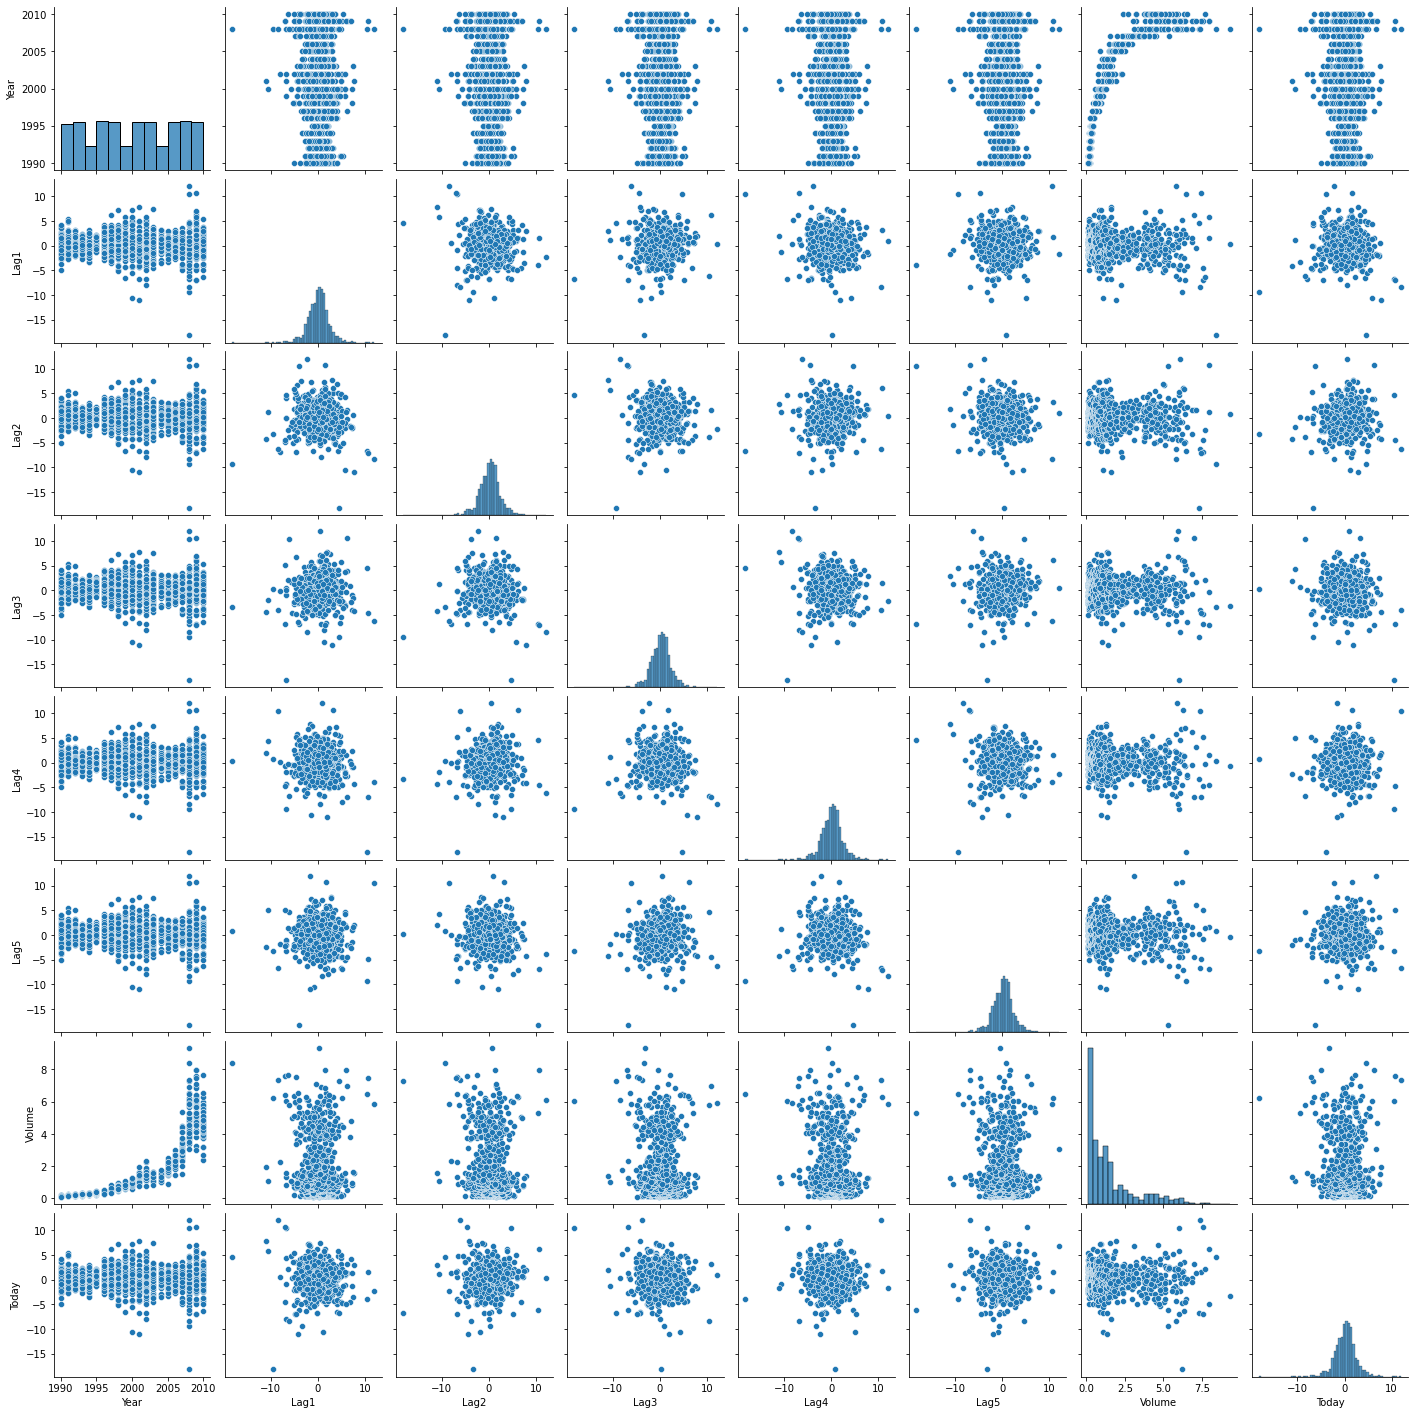

In [109]:
weekly_df = pd.read_csv("../data/Weekly.csv").dropna()
sns.pairplot(weekly_df)

(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?
- Lag2 seems to be statistically significant at p=0.03 (apart from the intercept)

In [110]:
X = weekly_df.drop(columns=["Direction", "Year", "Today"])
X = sm.add_constant(X)
y = weekly_df["Direction"].map(lambda x: 1 if x == "Up" else 0)
model = sm.Logit(y, X)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.
- Accuracy is at 56%
- Confusion matrix tells us the number of Type I (False positive) and Type II (False negative) errors 

Accuracy: 0.5610651974288338


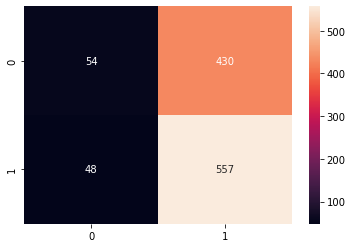

In [111]:
y_pred = (results.predict(X) > 0.5).map(int).values
df_cm = metrics.confusion_matrix(y.values, y_pred)
acc = metrics.accuracy_score(y, y_pred)
sns.heatmap(df_cm, annot=True, fmt="d")
print(f"Accuracy: {acc}")

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).
- Accuracy is now at 62.5%

/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Accuracy of LR on test set: 0.625


<AxesSubplot:>

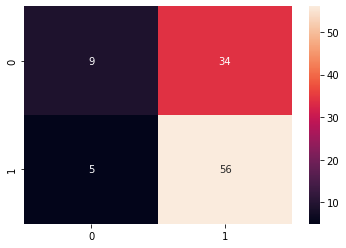

In [112]:
train_mask = weekly_df["Year"] <= 2008
X_train = weekly_df[train_mask][["Lag2"]]
X_test = weekly_df[~train_mask][["Lag2"]]
y_train = y[train_mask]
y_test = y[~train_mask]

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.Logit(y_train, X_train)
results = model.fit()

y_pred = (results.predict(X_test) > 0.5).map(int).values
df_cm = metrics.confusion_matrix(y_test.values, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of LR on test set: {acc}")
sns.heatmap(df_cm, annot=True, fmt="d")

(e) Repeat (d) using LDA.

Accuracy on test set of LDA: 0.625


<AxesSubplot:>

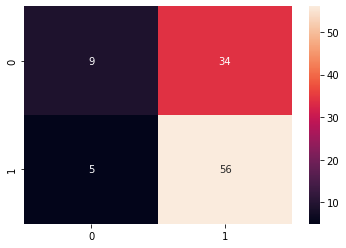

In [113]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train.drop(columns="const"), y_train)
y_pred_lda = model_lda.predict(X_test.drop(columns="const"))

df_cm_lda = metrics.confusion_matrix(y_test.values, y_pred_lda)
acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"Accuracy on test set of LDA: {acc_lda}")
sns.heatmap(df_cm_lda, annot=True, fmt="d")

(f) Repeat (d) using QDA.
- Note: QDA does not predict any sample as positive

Accuracy on test set of QDA: 0.5865384615384616


<AxesSubplot:>

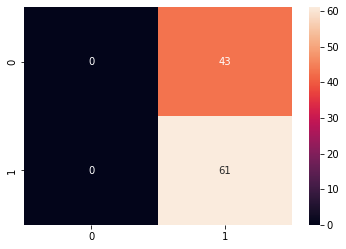

In [114]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train.drop(columns="const"), y_train)
y_pred_qda = model_qda.predict(X_test.drop(columns="const"))

df_cm_qda = metrics.confusion_matrix(y_test.values, y_pred_qda)
acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
print(f"Accuracy on test set of QDA: {acc_qda}")
sns.heatmap(df_cm_qda, annot=True, fmt="d")

(g) Repeat (d) using KNN with K = 1.

Accuracy on test set of KNN (K=1): 0.5


<AxesSubplot:>

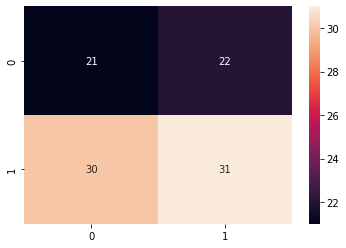

In [115]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train.drop(columns="const"), y_train)
y_pred_knn = model_knn.predict(X_test.drop(columns="const"))

df_cm_knn = metrics.confusion_matrix(y_test.values, y_pred_knn)
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f"Accuracy on test set of KNN (K=1): {acc_knn}")
sns.heatmap(df_cm_knn, annot=True, fmt="d")

(h) Which of these methods appears to provide the best results on this data?
- Seems like the best results are achieved by the Logistic Regression and LDA

(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

- Experiment with different values of K in KNN - the test accuracy increases with the number of neighbours and stabilises at ~0.567
- One could try experimenting with LR, LDA, QDA with interactions like `Lag1 * Lag2`

In [116]:
acc = {}
for k in [1, 5, 10, 100]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train.drop(columns="const"), y_train)
    y_pred_knn = model_knn.predict(X_test.drop(columns="const"))

    df_cm_knn = metrics.confusion_matrix(y_test.values, y_pred_knn)
    acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
    acc[k] = acc_knn
print(acc)

{1: 0.5, 5: 0.5288461538461539, 10: 0.5673076923076923, 100: 0.5673076923076923}


### 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set

In [117]:
auto_df = pd.read_csv("../data/Auto.csv").dropna()
# Data point in position 32 has a value of "horsepower" == '?'
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"], errors="coerce")
auto_df = auto_df.dropna()

(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [118]:
mpg_median = auto_df["mpg"].median()
auto_df["mpg01"] = (auto_df["mpg"] >= mpg_median).apply(int)

In [119]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1


(b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
- By visual inspecion, horsepower seems to be useful in preedicting `mpg01` (for horespower values around `>=150`, the `mpg0 = 0` always). Other than that, cylinders, displacement, horespower, weight, acceleraion

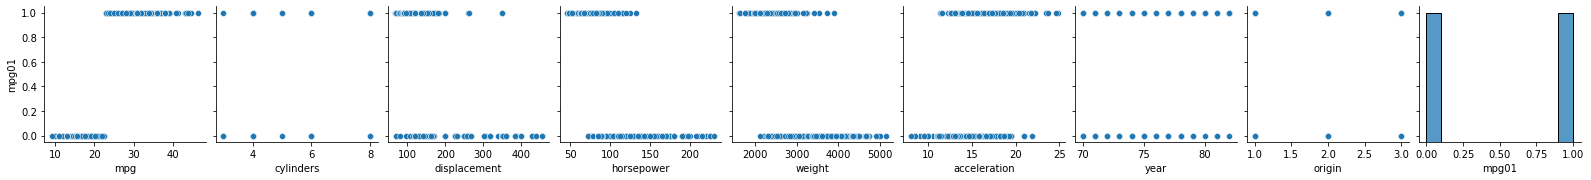

In [120]:
sns.pairplot(auto_df.drop(columns="name"), y_vars="mpg01")

/Users/tomasz_bartkowiak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg01', ylabel='cylinders'>

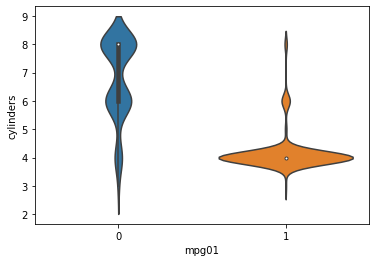

In [121]:
sns.violinplot(auto_df["mpg01"], y=auto_df["cylinders"])

(c) Split the data into a training set and a test set.

In [122]:
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
D_train, D_test = train_test_split(auto_df, test_size=0.2)
X_train = D_train[features]
X_test = D_test[features]
y_train = D_train["mpg01"]
y_test = D_test["mpg01"]

(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?
- Test error rate is around 9%

In [123]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

df_cm_lda = metrics.confusion_matrix(y_test.values, y_pred_lda)
acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"Accuracy on test set of LDA: {acc_lda}")
# sns.heatmap(df_cm_lda, annot=True, fmt="d")

Accuracy on test set of LDA: 0.8860759493670886


(e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?
- Test error rate is around 10%

Accuracy on test set of QDA: 0.8734177215189873


<AxesSubplot:>

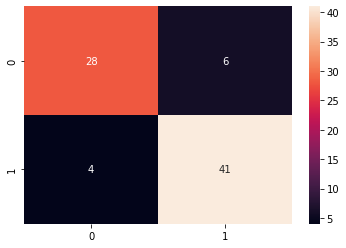

In [124]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)
y_pred_qda = model_qda.predict(X_test)

df_cm_qda = metrics.confusion_matrix(y_test.values, y_pred_qda)
acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
print(f"Accuracy on test set of QDA: {acc_qda}")
sns.heatmap(df_cm_qda, annot=True, fmt="d")

(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?
- Test error rate is around 15%

In [125]:
model = sm.Logit(y_train, X_train)
results = model.fit()

y_pred = (results.predict(X_test) > 0.5).map(int).values
df_cm = metrics.confusion_matrix(y_test.values, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of LR on test set: {acc}")

Optimization terminated successfully.
         Current function value: 0.294865
         Iterations 8
Accuracy of LR on test set: 0.8481012658227848


(g) Perform KNN on the training data, with several values of `K`, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?
- Best test error rate (5%) is achieved for `K=5`

In [126]:
acc = {}
for k in [1, 5, 10, 100]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)

    df_cm_knn = metrics.confusion_matrix(y_test.values, y_pred_knn)
    acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
    acc[k] = acc_knn
print(acc)

{1: 0.9113924050632911, 5: 0.8227848101265823, 10: 0.8734177215189873, 100: 0.8860759493670886}


### 12. This problem involves writing functions

(a) Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results

In [127]:
power = lambda x: pow(x, 3)

(b) Create a new function, `Power2()`, that allows you to pass any two numbers, `x` and `a`, and prints out the value of $x^a$

In [128]:
power2 = lambda x, a: pow(x, a)

(c) Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$

In [129]:
power2(10, 3), power2(8, 17), power2(131, 3)

(1000, 2251799813685248, 2248091)

(d) Now create a new function, `Power3()`, that actually returns the result $x^a$ as an R object (...)
- N/A

(e) Now using the `Power3()` function, create a plot of `f(x) = x^2`. The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$

Text(0.5, 1.0, '$f=x^2$')

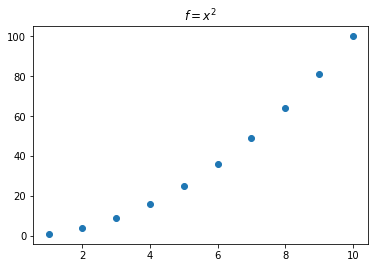

In [130]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 11), [power2(x, 2) for x in range(1, 11)])
ax.set_title("$f=x^2$")

(f) Create a function, `PlotPower()`, that allows you to create a plot of x against $x^a$ for a fixed `a` and for a range of values of `x`

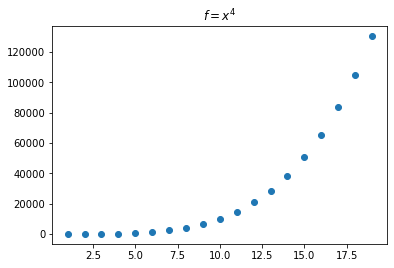

In [131]:
def plotPower(x_min: int, x_max: int, a: int):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(range(x_min, x_max), [power2(x, a) for x in range(x_min, x_max)])
    ax.set_title(f"$f=x^{a}$")
plotPower(1, 20, 4)

### 13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.
- Test set error for LR: 6%, LDA: 15%, KNN: 9% (1 <= K <= 10) (but it varies a lot depending on the random seed, so Cross-Validation would be encouraged)

In [150]:
boston_df = pd.read_csv("../data/Boston.csv").dropna()
boston_crim_median = boston_df.crim.median()
boston_df["crime_above_median"] = (boston_df["crim"] > boston_crim_median).apply(int)
D_train, D_test = train_test_split(boston_df, test_size=0.2)
X_train, X_test = D_train.drop(columns=["crim", "crime_above_median"]), D_test.drop(columns=["crim", "crime_above_median"])
y_train, y_test = D_train["crime_above_median"], D_test["crime_above_median"]

In [151]:
model = sm.Logit(y_train, X_train)
results = model.fit()

y_pred = (results.predict(X_test) > 0.5).map(int).values
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of LR on test set: {acc}")

Optimization terminated successfully.
         Current function value: 0.229693
         Iterations 10
Accuracy of LR on test set: 0.8431372549019608


In [152]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
print(f"Accuracy on test set of LDA: {acc_lda}")

Accuracy on test set of LDA: 0.8333333333333334


In [153]:
acc = {}
for k in [1, 5, 10, 100]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)

    acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
    acc[k] = acc_knn
print(acc)

{1: 0.9313725490196079, 5: 0.8725490196078431, 10: 0.8333333333333334, 100: 0.7941176470588235}
